# Finesse 3 - Mode matching

This notebook checks some of the funcionality surrounding mode matching. At the time of writing it is a just checking that the functions run without error. More _validation_ testing is required.

In [1]:
import finesse
from finesse.plotting.plot import ws_phase_space
import finesse.gaussian as gaussian
finesse.configure(plotting=True,log_level="info")

import matplotlib.pyplot as plt
import numpy as np

IFO = finesse.Model()

# Create a model of a power recycled cavity
# with some focusing elements
# based on Gingin
IFO.parse_legacy("""

s sIO_PR 1.0 IO_no PR_ni
m PR_m1 0.97 0.03 0.0 PR_ni PR_n1
attr PR_m1 Rcx 2
attr PR_m1 Rcy 2
s PR_s1 7.0 PR_n1 PR_n2
bs PR_m2 1.0 0.0 0.0 -0.07130746478529032 PR_n2 PR_n3 PR_m2_t1 PR_m2_t2
attr PR_m2 Rcx 19.2
attr PR_m2 Rcy 19.2
s PR_s2 7.0178344238090995 PR_n3 PR_n4
bs PR_m3 1.0 0.0 0.0 0.07130746478529032 PR_n4 PR_n5 PR_m3_t1 PR_m3_t2
attr PR_m3 Rcx 37.5
attr PR_m3 Rcy 37.5
s sPR_SC 7.0 PR_n5 SC_ni
pd0 PR_circ PR_n3

l IO_l 2.5 0.0 0.0 IO_ni
s IO_s1 0.1 IO_ni IO_FI_ni
dbs IO_FI IO_FI_ni IO_dump IO_no nREFL
pd0 REFL_dc nREFL
m SC_itm 0.994 0.006 0.0 SC_ni SC_n1
attr SC_itm Rcx -44.09
attr SC_itm Rcy -44.09
s Larm 72.0 SC_n1 SC_n2
m SC_etm 0.99999 1e-05 0.0 SC_n2 SC_no
attr SC_etm Rcx 44.8
attr SC_etm Rcy 44.8
cav SC SC_etm SC_n2 SC_itm SC_n1
pd0 SC_trans SC_no
pd0 SC_circ SC_n2
maxtem 0
yaxis abs
lambda 2e-06

""")

## Beam Tracing and Plotting
Plot the beam trace. This is simply a _executes without error test_.

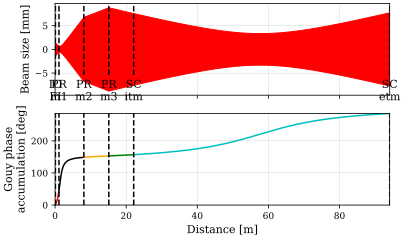

(<Figure size 576x355.968 with 2 Axes>,
 array([<AxesSubplot:ylabel='Beam size [mm]'>,
        <AxesSubplot:xlabel='Distance [m]', ylabel='Gouy phase\naccumulation [deg]'>],
       dtype=object))

In [2]:
trace = IFO.beam_trace()
ts = finesse.tracing.tools.propagate_beam(IFO.IO_l.p1.o, IFO.SC_etm.p2.o)
ts.plot()

## WS Space Plots
Check the functionality in these plots.

/home/aaron/git/finesse3/src/finesse/plotting/plot.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(f"{(x / wsv):.2f}" for x in ax.get_xticks())
/home/aaron/git/finesse3/src/finesse/plotting/plot.py:117: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(f"{(y / ssv):.2f}" for y in ax.get_yticks())


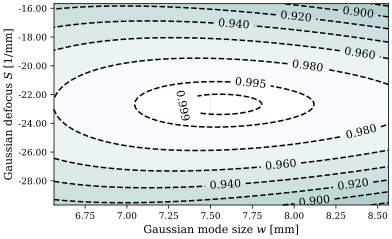

In [3]:
# useful beam parameters
bp_itm_cav_eigen = trace[IFO.SC_itm.p2.o][0]

soff = 7e-3
woff = 1e-3

# Test 1, check it runs ok
fig, ax = ws_phase_space(
    *gaussian.ws_overlap_grid(bp_itm_cav_eigen, woffset=woff, soffset=soff),
    levels=[0.5, 0.6, 0.7, 0.75, 0.8, 0.84, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 0.995, 0.999],
    show=False,
    wscale="mm",
    sscale="mm"
)

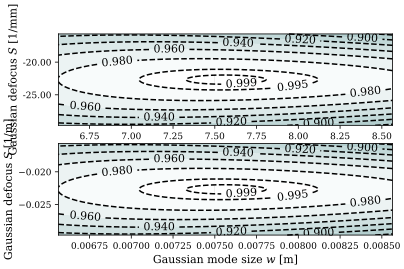

In [4]:
# Test 2: check I can specify a figure and axes
fig, ax = plt.subplots(nrows=2)

_fig, _ax = ws_phase_space(
    *gaussian.ws_overlap_grid(bp_itm_cav_eigen, woffset=woff, soffset=soff),
    levels=[0.5, 0.6, 0.7, 0.75, 0.8, 0.84, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 0.995, 0.999],
    show=False,
    wscale="mm",
    sscale="mm",
    fig=fig,
    ax=ax[0]
)
assert _fig is fig
assert _ax is ax[0]

_fig, _ax = ws_phase_space(
    *gaussian.ws_overlap_grid(bp_itm_cav_eigen, woffset=woff, soffset=soff),
    levels=[0.5, 0.6, 0.7, 0.75, 0.8, 0.84, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 0.995, 0.999],
    show=False,
    wscale="m",
    sscale="m",
    fig=fig,
    ax=ax[1]
)

assert _fig is fig
assert _ax is ax[1]

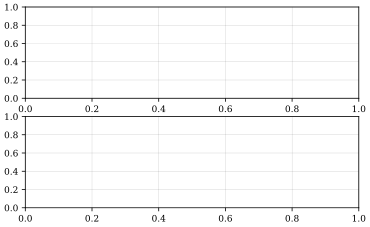

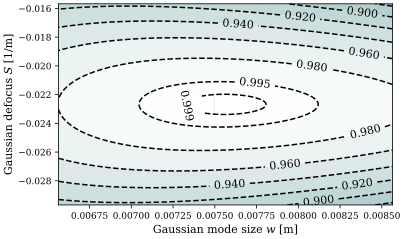

In [5]:
# Check axes ignored if figure is not specified
fig, ax = plt.subplots(nrows=2)

_fig, _ax = ws_phase_space(
    *gaussian.ws_overlap_grid(bp_itm_cav_eigen, woffset=woff, soffset=soff),
    levels=[0.5, 0.6, 0.7, 0.75, 0.8, 0.84, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 0.995, 0.999],
    show=False,
    wscale="m",
    sscale="m",
    ax=ax[1]
)
assert _ax is not ax[1]

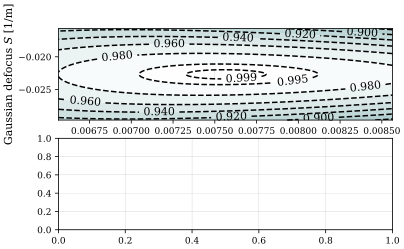

In [6]:
# Check figure without axes
fig, ax = plt.subplots(nrows=2)

_fig, _ax = ws_phase_space(
    *gaussian.ws_overlap_grid(bp_itm_cav_eigen, woffset=woff, soffset=soff),
    levels=[0.5, 0.6, 0.7, 0.75, 0.8, 0.84, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 0.995, 0.999],
    show=False,
    wscale="m",
    sscale="m",
    fig = fig
)
assert fig is _fig
assert _ax is ax[0]

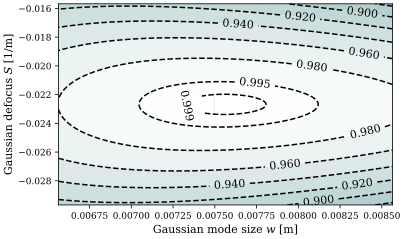

In [7]:
# Check figure without axes defined
fig = plt.figure()

_fig, _ax = ws_phase_space(
    *gaussian.ws_overlap_grid(bp_itm_cav_eigen, woffset=woff, soffset=soff),
    levels=[0.5, 0.6, 0.7, 0.75, 0.8, 0.84, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 0.995, 0.999],
    show=False,
    wscale="m",
    sscale="m",
    fig = fig
)
assert fig is _fig